Given two teams' SRS ratings:
* Generate random normal variable
* 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from __future__ import division
%load_ext rpy2.ipython
%matplotlib inline
pd.set_option('display.max_columns', 1000)

In [11]:
RAMS = pd.read_csv('teams_ram__team_index.csv', skiprows=2)
rams = RAMS[['Year','Tm','W','L','T','MoV','SoS','SRS','OSRS','DSRS']]
rams.head()

,Year,Tm,W,L,T,MoV,SoS,SRS,OSRS,DSRS
0,2015,St. Louis Rams,7,9,0,-3.1,3.0,-0.2,-3.8,3.6
1,2014,St. Louis Rams,6,10,0,-1.9,1.0,-0.8,-1.2,0.4
2,2013,St. Louis Rams,7,9,0,-1.0,3.2,2.2,0.4,1.8
3,2012,St. Louis Rams,7,8,1,-3.1,3.4,0.4,-2.1,2.4
4,2011,St. Louis Rams,2,14,0,-13.4,2.9,-10.4,-8.4,-2.1


In [144]:
def game_sim(homeyear, awayyear, p=True):
    '''
    Takes a home and away team SRS and spits out a normal random variable
    '''
    homerow = rams[rams['Year'] == homeyear]
    awayrow = rams[rams['Year'] == awayyear]
    try:
        srshome = float(homerow['SRS'])
    except TypeError:
        print "No home team for {}".format(homeyear)
        return None
    
    try:
        srsaway = float(awayrow['SRS'])
    except TypeError:
        print "No away team for {}".format(awayyear)
        return None
    
    pointdiff = srshome - srsaway
    result = np.random.normal(pointdiff, 13.45)
    if p:
        print "Matchup:"
        print "Home team: {} ({}-{}-{}) SRS {}".format(
            int(homerow['Year']),
            int(homerow['W']),
            int(homerow['L']),
            int(homerow['T']),
            srshome
        )
        print "Away team: {} ({}-{}-{}) SRS {}".format(
            int(awayrow['Year']),
            int(awayrow['W']),
            int(awayrow['L']),
            int(awayrow['T']),
            srsaway
        )

        print ('Home team' if pointdiff > 0 else 'Away team') + ' favored by {}'.format(int(abs(round(pointdiff))))
        print 'Simulating ...'
        print ('Home team' if result > 0 else 'Away team') + ' won by {}'.format(int(abs(round(result))))
        return None
    return result

In [155]:
game_sim(1989, 2003)

Matchup:
Home team: 1989 (11-5-0) SRS 4.6
Away team: 2003 (12-4-0) SRS 5.9
Away team favored by 1
Simulating ...
Away team won by 24


In [156]:
sims = [game_sim(1989,2003,False) for _ in range(0,1000)]

(array([   4.,   23.,   82.,  179.,  266.,  233.,  137.,   55.,   18.,    3.]),
 array([-43.39351251, -34.60220765, -25.81090279, -17.01959793,
         -8.22829307,   0.56301179,   9.35431665,  18.14562151,
         26.93692637,  35.72823123,  44.51953609]),
 <a list of 10 Patch objects>)

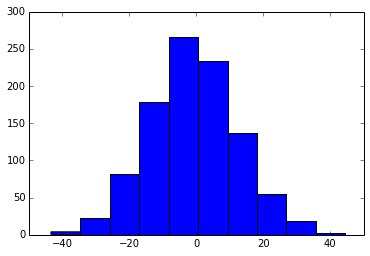

In [157]:
plt.hist(sims)